MODELOS DE RNN (LSTM) PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO

Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

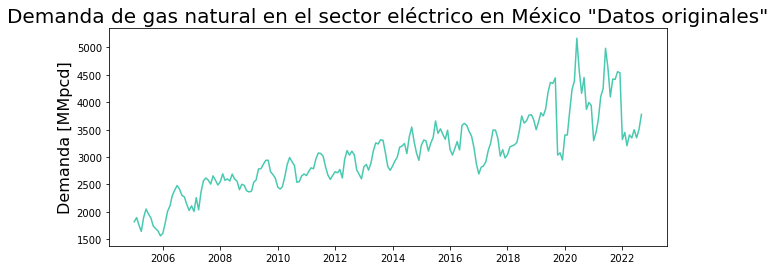

In [29]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

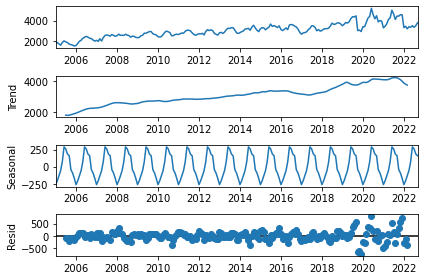

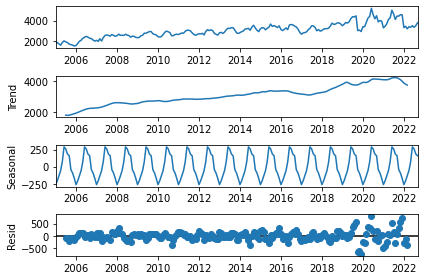

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [31]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
csv_demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

csv_demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Para la aplicación de RNN(LSTM) combiene escalar la data. Por lo que se define y entrena el MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(csv_demanda_electrico_original_train_data)

MinMaxScaler()

Se aplica la escalación de data

In [33]:
csv_demanda_electrico_scaled_train = MinMax_scaler.transform(csv_demanda_electrico_original_train_data)
csv_demanda_electrico_scaled_test = MinMax_scaler.transform(csv_demanda_electrico_original_test_data)
csv_demanda_electrico_scaled_train

array([[0.07168816],
       [0.09268731],
       [0.0567961 ],
       [0.02265413],
       [0.09274552],
       [0.13604118],
       [0.11118319],
       [0.09111549],
       [0.04937779],
       [0.03740758],
       [0.02438673],
       [0.        ],
       [0.0137139 ],
       [0.06801505],
       [0.1236108 ],
       [0.15172886],
       [0.20456354],
       [0.23227963],
       [0.2549393 ],
       [0.23621611],
       [0.20444988],
       [0.1976359 ],
       [0.15896421],
       [0.12890563],
       [0.15187856],
       [0.12359139],
       [0.19350815],
       [0.13185522],
       [0.2219949 ],
       [0.27894624],
       [0.2931425 ],
       [0.28230888],
       [0.26220515],
       [0.30390127],
       [0.28192632],
       [0.25737049],
       [0.27370963],
       [0.31419986],
       [0.28129981],
       [0.28810548],
       [0.27775144],
       [0.31287199],
       [0.28763698],
       [0.27746314],
       [0.23393184],
       [0.26135964],
       [0.25557967],
       [0.228

When using a RNN for multi-step time series forecasting there are two main approaches to take: 
a) Direct Multi-Step Forecast:Prefict all future time steps directly using a single Dense output layer.
b) Auto-Regresive Prediction: Predict one step at a time and feed the predicted value back into the model to predict the next step
Source: Spencer Pao, RNN Appliying Understanding Recurrent NN in Python 

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

In [34]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [50]:
# We do the same thing, but now instead for 12 months
n_input = 48
demanda_electrico_scaled_train_generator = TimeseriesGenerator(csv_demanda_electrico_scaled_train, csv_demanda_electrico_scaled_train, length=n_input, batch_size=1)
demanda_electrico_scaled_train_generator

In [51]:
X,y = demanda_electrico_scaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07168816 0.09268731 0.0567961  0.02265413 0.09274552 0.13604118
 0.11118319 0.09111549 0.04937779 0.03740758 0.02438673 0.
 0.0137139  0.06801505 0.1236108  0.15172886 0.20456354 0.23227963
 0.2549393  0.23621611 0.20444988 0.1976359  0.15896421 0.12890563
 0.15187856 0.12359139 0.19350815 0.13185522 0.2219949  0.27894624
 0.2931425  0.28230888 0.26220515 0.30390127 0.28192632 0.25737049
 0.27370963 0.31419986 0.28129981 0.28810548 0.27775144 0.31287199
 0.28763698 0.27746314 0.23393184 0.26135964 0.25557967 0.22813248]
Predict this y: 
 [[0.22262419]]


In [52]:
X,y = demanda_electrico_scaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.09268731 0.0567961  0.02265413 0.09274552 0.13604118 0.11118319
 0.09111549 0.04937779 0.03740758 0.02438673 0.         0.0137139
 0.06801505 0.1236108  0.15172886 0.20456354 0.23227963 0.2549393
 0.23621611 0.20444988 0.1976359  0.15896421 0.12890563 0.15187856
 0.12359139 0.19350815 0.13185522 0.2219949  0.27894624 0.2931425
 0.28230888 0.26220515 0.30390127 0.28192632 0.25737049 0.27370963
 0.31419986 0.28129981 0.28810548 0.27775144 0.31287199 0.28763698
 0.27746314 0.23393184 0.26135964 0.25557967 0.22813248 0.22262419]
Predict this y: 
 [[0.22627513]]


Se importan las librerias necesarias y se define la RNN(LSTM)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [54]:
n_input = 48
n_features = 1
# define model
model_LSTM_and_Dense = Sequential()
model_LSTM_and_Dense.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_LSTM_and_Dense.add(Dense(1))
model_LSTM_and_Dense.compile(optimizer='adam', loss='mse')

In [55]:
model_LSTM_and_Dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo RNN(LSTM) + Dense Layers con el demanda_electrico_scaled_train_generator

In [56]:
model_LSTM_and_Dense.fit(demanda_electrico_scaled_train_generator, epochs=25)

Epoch 1/25


153/153 [==============================] - 4s 12ms/step - loss: 0.0304
Epoch 2/25
153/153 [==============================] - 2s 14ms/step - loss: 0.0106
Epoch 3/25
153/153 [==============================] - 2s 12ms/step - loss: 0.0106
Epoch 4/25
153/153 [==============================] - 2s 13ms/step - loss: 0.0101
Epoch 5/25
153/153 [==============================] - 2s 12ms/step - loss: 0.0089
Epoch 6/25
153/153 [==============================] - 2s 13ms/step - loss: 0.0091
Epoch 7/25
153/153 [==============================] - 2s 12ms/step - loss: 0.0101
Epoch 8/25
153/153 [==============================] - 2s 13ms/step - loss: 0.0093
Epoch 9/25
153/153 [==============================] - 2s 12ms/step - loss: 0.0082
Epoch 10/25
153/153 [==============================] - 2s 13ms/step - loss: 0.0081
Epoch 11/25
153/153 [==============================] - 2s 12ms/step - loss: 0.0079
Epoch 12/25
153/153 [==============================] - 2s 13ms/step - loss: 0.0070
Epoch 13/25
153/153 [===

Se grafica la perdida por epoch 

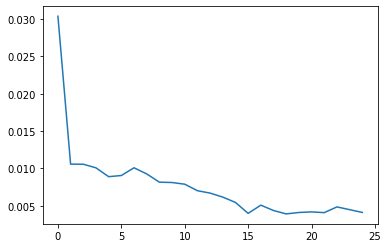

In [57]:
loss_per_epoch = model_LSTM_and_Dense.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_LSTM_and_Dense previamente definido y entrenado

Se toman los ultimos n_input elementos de los datos de train y se almacenan en un batch

In [58]:
demanda_electrico_scaled_train_batch = csv_demanda_electrico_scaled_train[-n_input:]
demanda_electrico_scaled_train_batch

array([[0.40368254],
       [0.43645507],
       [0.39437639],
       [0.41041336],
       [0.45071508],
       [0.45529747],
       [0.46060616],
       [0.47385988],
       [0.53189791],
       [0.60713444],
       [0.57099097],
       [0.58308592],
       [0.6111818 ],
       [0.61300034],
       [0.58643192],
       [0.53755035],
       [0.57844531],
       [0.62283044],
       [0.60697088],
       [0.64189461],
       [0.72735488],
       [0.7764804 ],
       [0.77139071],
       [0.79957253],
       [0.40929895],
       [0.42016029],
       [0.38425244],
       [0.51049126],
       [0.51049126],
       [0.62604337],
       [0.74135154],
       [0.7836714 ],
       [1.        ],
       [0.83747356],
       [0.72153611],
       [0.80133008],
       [0.64003449],
       [0.67506632],
       [0.65981388],
       [0.48164966],
       [0.52483443],
       [0.58778751],
       [0.7051942 ],
       [0.74375778],
       [0.94934147],
       [0.85129557],
       [0.70352813],
       [0.793

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [59]:
demanda_electrico_scaled_train_batch_reshaped = demanda_electrico_scaled_train_batch.reshape(1,n_input, n_features)
demanda_electrico_scaled_train_batch_reshaped

array([[[0.40368254],
        [0.43645507],
        [0.39437639],
        [0.41041336],
        [0.45071508],
        [0.45529747],
        [0.46060616],
        [0.47385988],
        [0.53189791],
        [0.60713444],
        [0.57099097],
        [0.58308592],
        [0.6111818 ],
        [0.61300034],
        [0.58643192],
        [0.53755035],
        [0.57844531],
        [0.62283044],
        [0.60697088],
        [0.64189461],
        [0.72735488],
        [0.7764804 ],
        [0.77139071],
        [0.79957253],
        [0.40929895],
        [0.42016029],
        [0.38425244],
        [0.51049126],
        [0.51049126],
        [0.62604337],
        [0.74135154],
        [0.7836714 ],
        [1.        ],
        [0.83747356],
        [0.72153611],
        [0.80133008],
        [0.64003449],
        [0.67506632],
        [0.65981388],
        [0.48164966],
        [0.52483443],
        [0.58778751],
        [0.7051942 ],
        [0.74375778],
        [0.94934147],
        [0

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test, dados los n_input anteriores

In [60]:
model_LSTM_and_Dense.predict(demanda_electrico_scaled_train_batch_reshaped)

1/1 [==============================] - 0s 212ms/step


array([[0.71686983]], dtype=float32)

Y se compara el valor de forecast del modelo model_LSTM_and_Dense con los datos de test de la demanda de gasd natural en sector eléctrico escalado 

In [61]:
csv_demanda_electrico_scaled_test[0]

array([0.791877])

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [62]:
n_input = 48
n_features = 1

In [63]:
test_predictions = []

first_eval_batch = csv_demanda_electrico_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_electrico_scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model_LSTM_and_Dense.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


In [64]:
test_predictions 

[array([0.71686983], dtype=float32),
 array([0.66239387], dtype=float32),
 array([0.61997813], dtype=float32),
 array([0.60871494], dtype=float32),
 array([0.63830554], dtype=float32),
 array([0.70166206], dtype=float32),
 array([0.7840615], dtype=float32),
 array([0.8515703], dtype=float32),
 array([0.8858648], dtype=float32),
 array([0.8849717], dtype=float32),
 array([0.85749763], dtype=float32),
 array([0.8005159], dtype=float32)]

In [26]:
csv_demanda_electrico_scaled_test

array([[0.791877  ],
       [0.83064572],
       [0.82552553],
       [0.48783713],
       [0.52361191],
       [0.45629267],
       [0.51076016],
       [0.49595403],
       [0.53716779],
       [0.49621461],
       [0.5393079 ],
       [0.61469691]])

In [65]:
true_predictions = MinMax_scaler.inverse_transform(test_predictions)
true_predictions

array([[4146.93737298],
       [3950.42677599],
       [3797.42090808],
       [3756.79130929],
       [3863.53320889],
       [4092.0785454 ],
       [4389.31717763],
       [4632.8410571 ],
       [4756.55121367],
       [4753.32948526],
       [4654.22263475],
       [4448.67296528]])

In [35]:
csv_demanda_electrico_original_test_data

,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [29]:
csv_demanda_electrico_original_test_data.dtypes

Demanded_Gas    float64
dtype: object

In [26]:
csv_demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

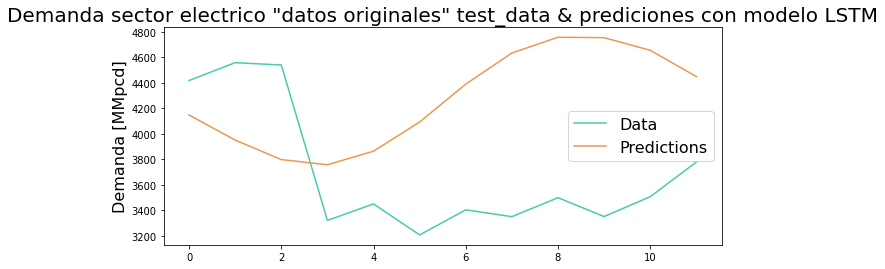

In [66]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(true_predictions, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo LSTM', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(csv_demanda_electrico_original_test_data['Demanded_Gas'],true_predictions))
print(rmse)

916.0245949643452
